<a href="https://colab.research.google.com/github/liliane-sougarc/womakerscode-Data-Analytics/blob/main/Exercicio_teste_a_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bloco 1: Importação de bibliotecas necessárias

In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para exibir gráficos no Colab
%matplotlib inline
sns.set(style="whitegrid")

Bloco 2: Carregamento dos dados

In [3]:
# Carregando o dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("/content/Experimento_teste_ab.csv")


# Visualizando as primeiras linhas do dataset
print("Primeiras linhas do dataset:")
display(df.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
df.info()

Saving Experimento_teste_ab.csv to Experimento_teste_ab.csv
Primeiras linhas do dataset:


,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0



Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


Bloco 3: Estatísticas descritivas

In [4]:
# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas:")
display(df.describe())

# Verificando a distribuição das variáveis categóricas
print("\nDistribuição da coluna 'Versão_Página':")
display(df['Versão_Página'].value_counts())


Estatísticas descritivas:


,Visitante_ID,Visualizações,Conversões
count,2000.000000,2000.000000,2000.000000
mean,1000.500000,150.755500,0.115000
std,577.494589,28.809421,0.319102
min,1.000000,100.000000,0.000000
25%,500.750000,126.000000,0.000000
50%,1000.500000,151.000000,0.000000
75%,1500.250000,175.000000,0.000000
max,2000.000000,199.000000,1.000000



Distribuição da coluna 'Versão_Página':


,count
Versão_Página,
A,1000
B,1000


Bloco 4: Verificação de valores nulos

In [5]:
# Verificando valores nulos
print("\nValores nulos no dataset:")
display(df.isnull().sum())


Valores nulos no dataset:


,0
Visitante_ID,0
Versão_Página,0
Visualizações,0
Conversões,0


Bloco 5: Análise de conversões

In [6]:
# Calculando a taxa de conversão geral
taxa_conversao_geral = df['Conversões'].mean()
print(f"\nTaxa de conversão geral: {taxa_conversao_geral:.2%}")

# Taxa de conversão por versão de página
taxa_conversao_por_pagina = df.groupby('Versão_Página')['Conversões'].mean()
print("\nTaxa de conversão por versão de página:")
display(taxa_conversao_por_pagina)


Taxa de conversão geral: 11.50%

Taxa de conversão por versão de página:


,Conversões
Versão_Página,
A,0.105
B,0.125


Bloco 6: Visualização de distribuições

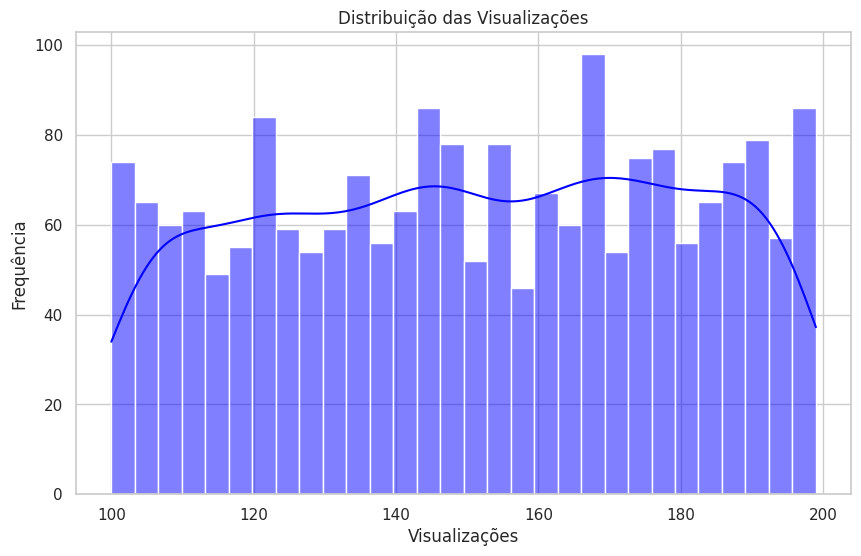

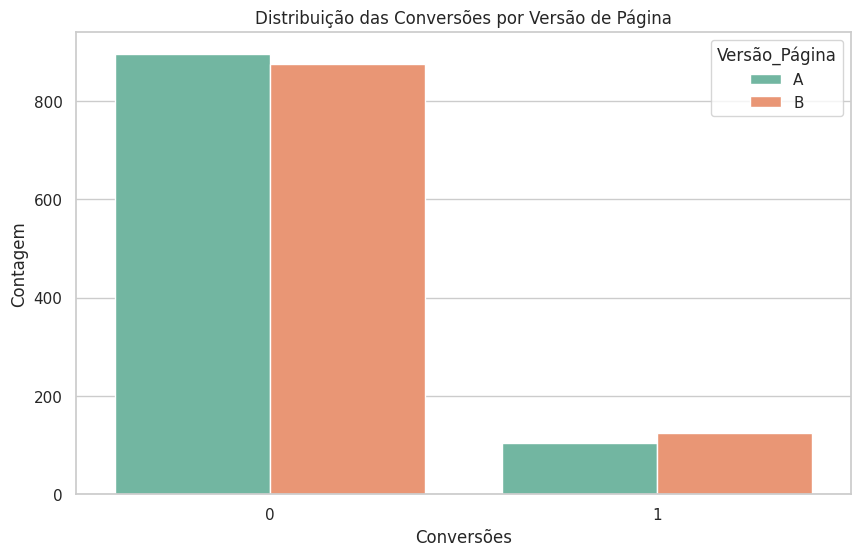

In [7]:
# Distribuição das visualizações
plt.figure(figsize=(10, 6))
sns.histplot(df['Visualizações'], bins=30, kde=True, color='blue')
plt.title('Distribuição das Visualizações')
plt.xlabel('Visualizações')
plt.ylabel('Frequência')
plt.show()

# Distribuição das conversões
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Conversões', hue='Versão_Página', palette='Set2')
plt.title('Distribuição das Conversões por Versão de Página')
plt.xlabel('Conversões')
plt.ylabel('Contagem')
plt.show()

Bloco 7: Teste de hipótese (teste A/B)

In [9]:
from scipy.stats import chi2_contingency

# Criando uma tabela de contingência para o teste qui-quadrado
tabela_contingencia = pd.crosstab(df['Versão_Página'], df['Conversões'])

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Resultados do teste
print("\nResultados do teste qui-quadrado:")
print(f"Valor de chi2: {chi2}")
print(f"Valor-p: {p}")
if p < 0.05:
    print("Rejeitamos a hipótese nula: há diferença significativa entre as versões.")
else:
    print("Não rejeitamos a hipótese nula: não há diferença significativa entre as versões.")


Resultados do teste qui-quadrado:
Valor de chi2: 1.7735200196511913
Valor-p: 0.18294704816234938
Não rejeitamos a hipótese nula: não há diferença significativa entre as versões.


Bloco 8: Correlação entre variáveis

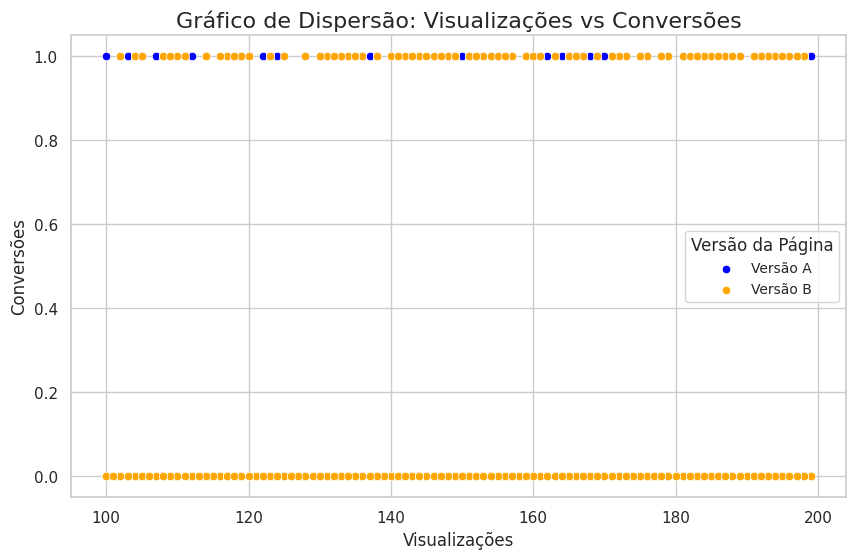

In [19]:
# Criar o gráfico de dispersão
plt.figure(figsize=(10, 6))

# Separar os dados por Versão_Página
sns.scatterplot(data=df[df['Versão_Página'] == 'A'], x='Visualizações', y='Conversões', color='blue', label='Versão A')
sns.scatterplot(data=df[df['Versão_Página'] == 'B'], x='Visualizações', y='Conversões', color='orange', label='Versão B')

# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Dispersão: Visualizações vs Conversões', fontsize=16)
plt.xlabel('Visualizações', fontsize=12)
plt.ylabel('Conversões', fontsize=12)

# Adicionar legenda
plt.legend(title='Versão da Página', fontsize=10)

# Mostrar o gráfico
plt.grid(True)
plt.show()

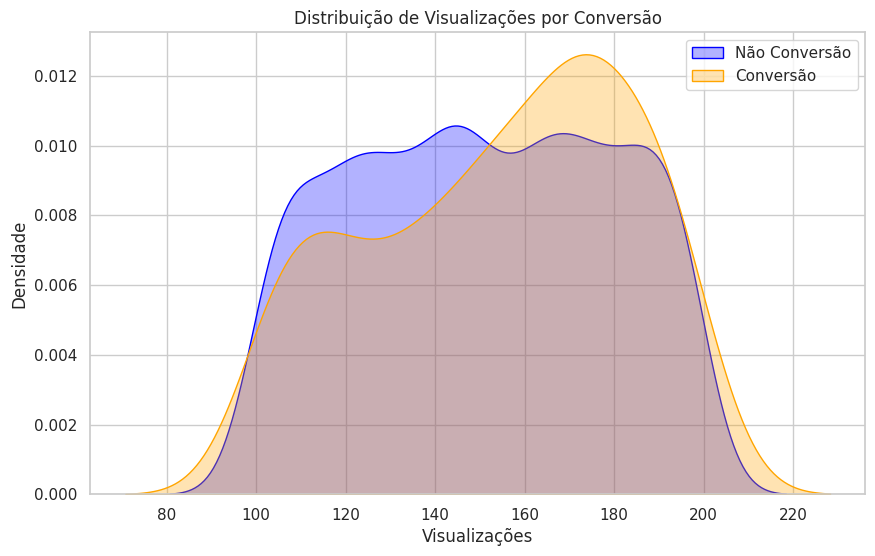

In [20]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Conversões'] == 0], x='Visualizações', label='Não Conversão', color='blue', fill=True, alpha=0.3)
sns.kdeplot(data=df[df['Conversões'] == 1], x='Visualizações', label='Conversão', color='orange', fill=True, alpha=0.3)
plt.title('Distribuição de Visualizações por Conversão')
plt.xlabel('Visualizações')
plt.ylabel('Densidade')
plt.legend()
plt.show()

<ipython-input-11-868791eeb541>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Versão_Página', y='Conversões', ci=None, palette='Set2')
<ipython-input-11-868791eeb541>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Versão_Página', y='Conversões', ci=None, palette='Set2')


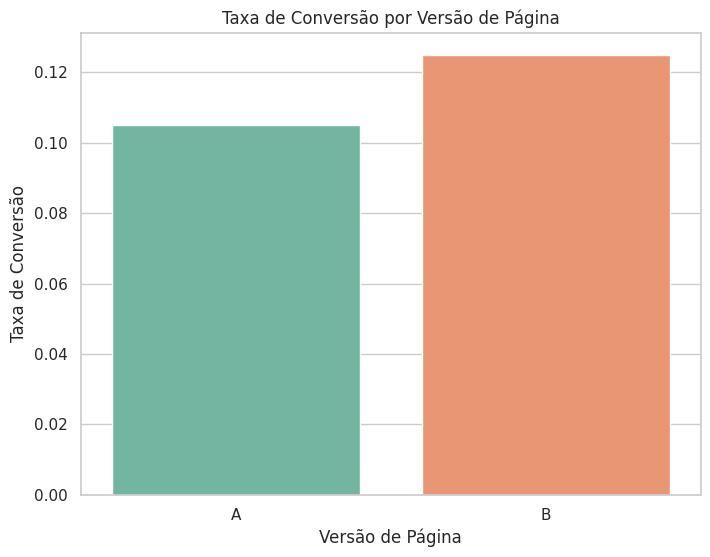

In [11]:
# Gráfico de barras para comparar taxas de conversão por versão de página
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='Versão_Página', y='Conversões', ci=None, palette='Set2')
plt.title('Taxa de Conversão por Versão de Página')
plt.ylabel('Taxa de Conversão')
plt.xlabel('Versão de Página')
plt.show()

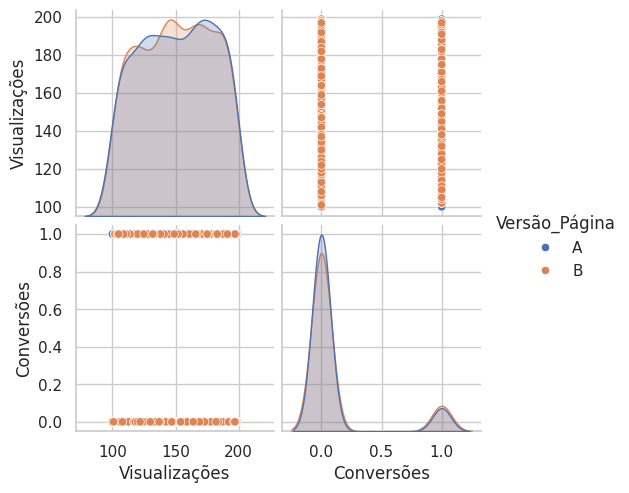

In [21]:
sns.pairplot(df, vars=['Visualizações', 'Conversões'], hue='Versão_Página')
plt.show()

Bloco 9: Conclusão

In [12]:
# Resumo dos insights
print("\nResumo dos insights:")
print("- A taxa de conversão geral foi calculada.")
print("- As taxas de conversão por versão de página foram comparadas.")
print("- A distribuição das visualizações e conversões foi visualizada.")
print("- Um teste qui-quadrado foi realizado para verificar diferenças significativas.")
print("- A matriz de correlação foi analisada para identificar relações entre variáveis.")


Resumo dos insights:
- A taxa de conversão geral foi calculada.
- As taxas de conversão por versão de página foram comparadas.
- A distribuição das visualizações e conversões foi visualizada.
- Um teste qui-quadrado foi realizado para verificar diferenças significativas.
- A matriz de correlação foi analisada para identificar relações entre variáveis.


## 1. Qual dos cenários tem a maior taxa de conversão?

In [14]:
# Calculando as taxas de conversão
taxa_conversao_A = df[df['Versão_Página'] == 'A']['Conversões'].mean()
taxa_conversao_B = df[df['Versão_Página'] == 'B']['Conversões'].mean()

print(f"Taxa de conversão para a Versão A: {taxa_conversao_A:.2%}")
print(f"Taxa de conversão para a Versão B: {taxa_conversao_B:.2%}")

Taxa de conversão para a Versão A: 10.50%
Taxa de conversão para a Versão B: 12.50%


### 2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de um teste A/B, seguindo os seguintes critérios:

a. O cenário A, da base, como o inicial, que funciona hoje.

b. Considere 95% de confiança de que o efeito na conversão não foi
aleatório com um nível de significância de 5% (alpha = 0,05).

c. Também considere 80% de certeza conseguir capturar o efeito
da nova abordagem.

d. O aumento para 10% de conversão.



---



Para calcular o tamanho da amostra necessário para um teste A/B, utilizaremos a fórmula baseada no teste de proporções.

Bloco 1: Instalação das bibliotecas necessárias

In [15]:
!pip install statsmodels numpy scipy

Bloco 2: Importação das bibliotecas necessárias

In [16]:
import numpy as np
from scipy.stats import norm

Bloco 3: Definição dos parâmetros iniciais

In [17]:
# Taxa de conversão inicial (cenário A)
p1 = 0.085  # 8.5% de conversão

# Taxa de conversão desejada (cenário B)
p2 = 0.10  # 10% de conversão

# Nível de significância (alpha) e confiança
alpha = 0.05  # 95% de confiança
beta = 0.20   # 80% de poder estatístico

# Valores críticos da distribuição normal
Z_alpha = norm.ppf(1 - alpha / 2)  # Valor crítico para 95% de confiança
Z_beta = norm.ppf(1 - beta)        # Valor crítico para 80% de poder

Bloco 4: Cálculo do tamanho da amostra

In [18]:
# Fórmula para o tamanho da amostra
numerador = (Z_alpha + Z_beta)**2 * (p1 * (1 - p1) + p2 * (1 - p2))
denominador = (p2 - p1)**2

# Tamanho da amostra por grupo
n = numerador / denominador

# Tamanho total da amostra (considerando dois grupos: A e B)
total_sample_size = int(np.ceil(2 * n))

print(f"Tamanho da amostra necessário por grupo: {int(np.ceil(n))}")
print(f"Tamanho total da amostra necessário (A + B): {total_sample_size}")

Tamanho da amostra necessário por grupo: 5853
Tamanho total da amostra necessário (A + B): 11706
